#### Importing the Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## Deliveries Dataset

#### Importing the datasets

In [3]:
Data_deliveries=pd.read_csv("C:/Users/abhir/OneDrive/Desktop/Dessertation/Option2/Data/deliveries.csv")

In [4]:
Data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
Data_deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
243812,1370353,2,Chennai Super Kings,Gujarat Titans,14,2,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243813,1370353,2,Chennai Super Kings,Gujarat Titans,14,3,RA Jadeja,MM Sharma,S Dube,1,0,1,NaN,0,NaN,NaN,NaN
243814,1370353,2,Chennai Super Kings,Gujarat Titans,14,4,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243815,1370353,2,Chennai Super Kings,Gujarat Titans,14,5,RA Jadeja,MM Sharma,S Dube,6,0,6,NaN,0,NaN,NaN,NaN
243816,1370353,2,Chennai Super Kings,Gujarat Titans,14,6,RA Jadeja,MM Sharma,S Dube,4,0,4,NaN,0,NaN,NaN,NaN


In [6]:
Data_deliveries.shape

(243817, 17)

In [7]:
Data_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          243817 non-null  int64 
 1   inning            243817 non-null  int64 
 2   batting_team      243817 non-null  object
 3   bowling_team      243817 non-null  object
 4   over              243817 non-null  int64 
 5   ball              243817 non-null  int64 
 6   batter            243817 non-null  object
 7   bowler            243817 non-null  object
 8   non_striker       243817 non-null  object
 9   batsman_runs      243817 non-null  int64 
 10  extra_runs        243817 non-null  int64 
 11  total_runs        243817 non-null  int64 
 12  extras_type       13059 non-null   object
 13  is_wicket         243817 non-null  int64 
 14  player_dismissed  12067 non-null   object
 15  dismissal_kind    12067 non-null   object
 16  fielder           8663 non-null    obj

In [8]:
Data_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
Data_deliveries.nunique()

match_id            1024
inning                 6
batting_team          18
bowling_team          18
over                  20
ball                  11
batter               637
bowler               503
non_striker          626
batsman_runs           7
extra_runs             7
total_runs             8
extras_type            5
is_wicket              2
player_dismissed     602
dismissal_kind        10
fielder              574
dtype: int64

In [10]:
Data_deliveries.count()

match_id            243817
inning              243817
batting_team        243817
bowling_team        243817
over                243817
ball                243817
batter              243817
bowler              243817
non_striker         243817
batsman_runs        243817
extra_runs          243817
total_runs          243817
extras_type          13059
is_wicket           243817
player_dismissed     12067
dismissal_kind       12067
fielder               8663
dtype: int64

In [11]:
Data_deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.438170e+05,243817.000000,243817.000000,243817.000000,243817.000000,243817.000000,243817.000000,243817.000000
mean,8.707328e+05,1.483777,9.195548,3.621495,1.252607,0.067173,1.319781,0.049492
std,3.532373e+05,0.502855,5.683962,1.812246,1.626760,0.341989,1.614449,0.216893
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483160e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,8.298190e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.216507e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.370353e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [12]:
Data_deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [13]:
Data_deliveries.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

## Matches Dataset

In [14]:
Data_matches=pd.read_csv("C:/Users/abhir/OneDrive/Desktop/Dessertation/Option2/Data/matches.csv")

### Data Cleaning

In [15]:
Data_deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         230758
is_wicket                0
player_dismissed    231750
dismissal_kind      231750
fielder             235154
dtype: int64

In [16]:
# Replacing null values in specific columns
Data_deliveries['extras_type'].fillna('None', inplace=True)
Data_deliveries['player_dismissed'].fillna('None', inplace=True)
Data_deliveries['dismissal_kind'].fillna('None', inplace=True)
Data_deliveries['fielder'].fillna('None', inplace=True)

In [17]:
# Checking if there are any remaining null values
print(Data_deliveries.isna().sum())

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [18]:
Data_matches.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1003
umpire1               0
umpire2               0
dtype: int64

In [19]:
# Replace null values in specific columns with appropriate placeholders
Data_matches['city'].fillna('Unknown', inplace=True)
Data_matches['player_of_match'].fillna('None', inplace=True)
Data_matches['winner'].fillna('No Result', inplace=True)
Data_matches['result_margin'].fillna('NA', inplace=True)
Data_matches['target_runs'].fillna(0, inplace=True)
Data_matches['target_overs'].fillna(0, inplace=True)
Data_matches['method'].fillna('None', inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_25352\2477054748.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Data_matches['result_margin'].fillna('NA', inplace=True)


In [20]:
# Checking if there are any remaining null values
print(Data_matches.isna().sum())

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64


#### Example of Aggregation

After handling null values, the code proceeds to conduct other important actions on the Data_deliveries dataset. Every type of dismissal is counted, with 'None' representing deliveries without dismissals, and the totals are printed. It displays the first few rows of a new DataFrame that only contains delivery and no additional runs after filtering the dataset. Lastly, it creates a bar plot that illustrates the number of each type of dismissal, helping in the visualisation of the distribution of dismissal types—including the category of "None." This guarantees thorough data analysis and accurate depiction of the dataset's attributes.

In [21]:
# Count the number of each type of dismissal
dismissal_counts = Data_deliveries['dismissal_kind'].value_counts()
print(dismissal_counts)

dismissal_kind
None                     231750
caught                     7437
bowled                     2089
run out                    1062
lbw                         750
caught and bowled           349
stumped                     345
retired hurt                 15
hit wicket                   15
retired out                   3
obstructing the field         2
Name: count, dtype: int64


In [22]:
# Filter deliveries where no extra runs were given
no_extra_deliveries = Data_deliveries[Data_deliveries['extras_type'] == 'None']
print(no_extra_deliveries.head())

   match_id  inning           batting_team                 bowling_team  over  \
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
5    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
7    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     1   

   ball       batter   bowler non_striker  batsman_runs  extra_runs  \
1     2  BB McCullum  P Kumar  SC Ganguly             0           0   
3     4  BB McCullum  P Kumar  SC Ganguly             0           0   
4     5  BB McCullum  P Kumar  SC Ganguly             0           0   
5     6  BB McCullum  P Kumar  SC Ganguly             0           0   
7     1  BB McCullum   Z Khan  SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
1      

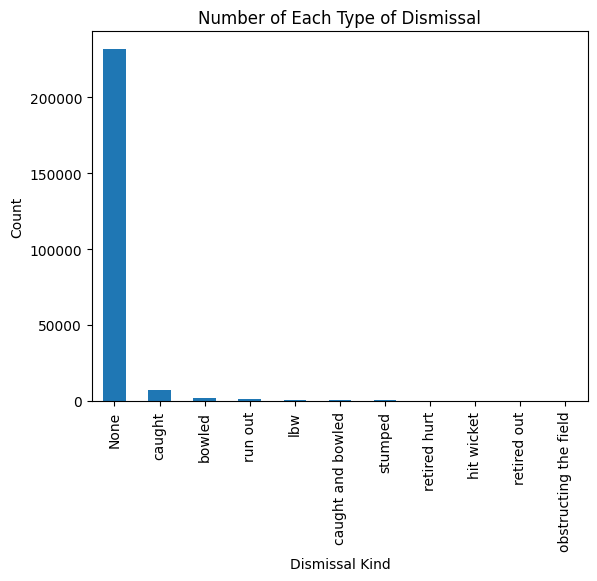

In [23]:
# Plot the number of each type of dismissal
dismissal_counts.plot(kind='bar')
plt.title('Number of Each Type of Dismissal')
plt.xlabel('Dismissal Kind')
plt.ylabel('Count')
plt.show()

#### Merging the Data_deliveries and Data_matches Datasets to Df_Merged

In [24]:
# Renaming 'id' to 'match_id' in matches dataset for merging
Data_matches.rename(columns={'id': 'match_id'}, inplace=True)

In [25]:
# Merging the datasets on 'match_id'
Df_Merged = pd.merge(Data_deliveries, Data_matches, how='inner', on='match_id')

In [26]:
Df_Merged

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,2,Chennai Super Kings,Gujarat Titans,14,2,S Dube,MM Sharma,RA Jadeja,1,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
243813,1370353,2,Chennai Super Kings,Gujarat Titans,14,3,RA Jadeja,MM Sharma,S Dube,1,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
243814,1370353,2,Chennai Super Kings,Gujarat Titans,14,4,S Dube,MM Sharma,RA Jadeja,1,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
243815,1370353,2,Chennai Super Kings,Gujarat Titans,14,5,RA Jadeja,MM Sharma,S Dube,6,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker


In [27]:
#file_path = "C:/Users/abhir/OneDrive/Desktop/Dessertation/Option2/Data/Df_Merged.csv"
#Df_Merged.to_csv(file_path, index=False)


In [28]:
Df_Merged.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
target_runs         0
target_overs        0
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [29]:
# Calculate the number of matches each team has played
team_matches_played = Df_Merged.groupby('team1')['match_id'].nunique() + Df_Merged.groupby('team2')['match_id'].nunique()
team_matches_played

team1
Chennai Super Kings            224
Deccan Chargers                 75
Delhi Capitals                  77
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  33
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          237
Lucknow Super Giants            30
Mumbai Indians                 247
Pune Warriors                   46
Punjab Kings                    42
Rajasthan Royals               206
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    240
Sunrisers Hyderabad            166
Name: match_id, dtype: int64

In [30]:
Df_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          243817 non-null  int64  
 1   inning            243817 non-null  int64  
 2   batting_team      243817 non-null  object 
 3   bowling_team      243817 non-null  object 
 4   over              243817 non-null  int64  
 5   ball              243817 non-null  int64  
 6   batter            243817 non-null  object 
 7   bowler            243817 non-null  object 
 8   non_striker       243817 non-null  object 
 9   batsman_runs      243817 non-null  int64  
 10  extra_runs        243817 non-null  int64  
 11  total_runs        243817 non-null  int64  
 12  extras_type       243817 non-null  object 
 13  is_wicket         243817 non-null  int64  
 14  player_dismissed  243817 non-null  object 
 15  dismissal_kind    243817 non-null  object 
 16  fielder           24

In [31]:
# Calculate the number of matches each team has won
team_wins = Df_Merged.groupby('winner')['match_id'].nunique()
team_wins

winner
Chennai Super Kings            131
Deccan Chargers                 29
Delhi Capitals                  41
Delhi Daredevils                67
Gujarat Lions                   13
Gujarat Titans                  23
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders          120
Lucknow Super Giants            17
Mumbai Indians                 140
No Result                        5
Pune Warriors                   12
Punjab Kings                    19
Rajasthan Royals               103
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore    116
Sunrisers Hyderabad             79
Name: match_id, dtype: int64

In [32]:
# Calculate the winning percentage
team_win_percentage = (team_wins / team_matches_played) * 100
team_win_percentage.round(2)

Chennai Super Kings            58.48
Deccan Chargers                38.67
Delhi Capitals                 53.25
Delhi Daredevils               41.61
Gujarat Lions                  43.33
Gujarat Titans                 69.70
Kings XI Punjab                46.32
Kochi Tuskers Kerala           42.86
Kolkata Knight Riders          50.63
Lucknow Super Giants           56.67
Mumbai Indians                 56.68
No Result                        NaN
Pune Warriors                  26.09
Punjab Kings                   45.24
Rajasthan Royals               50.00
Rising Pune Supergiant         62.50
Rising Pune Supergiants        35.71
Royal Challengers Bangalore    48.33
Sunrisers Hyderabad            47.59
Name: match_id, dtype: float64

In [33]:
# Sort by winning percentage
team_win_percentage = team_win_percentage.sort_values(ascending=False)
team_win_percentage.round(2)

Gujarat Titans                 69.70
Rising Pune Supergiant         62.50
Chennai Super Kings            58.48
Mumbai Indians                 56.68
Lucknow Super Giants           56.67
Delhi Capitals                 53.25
Kolkata Knight Riders          50.63
Rajasthan Royals               50.00
Royal Challengers Bangalore    48.33
Sunrisers Hyderabad            47.59
Kings XI Punjab                46.32
Punjab Kings                   45.24
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
No Result                        NaN
Name: match_id, dtype: float64

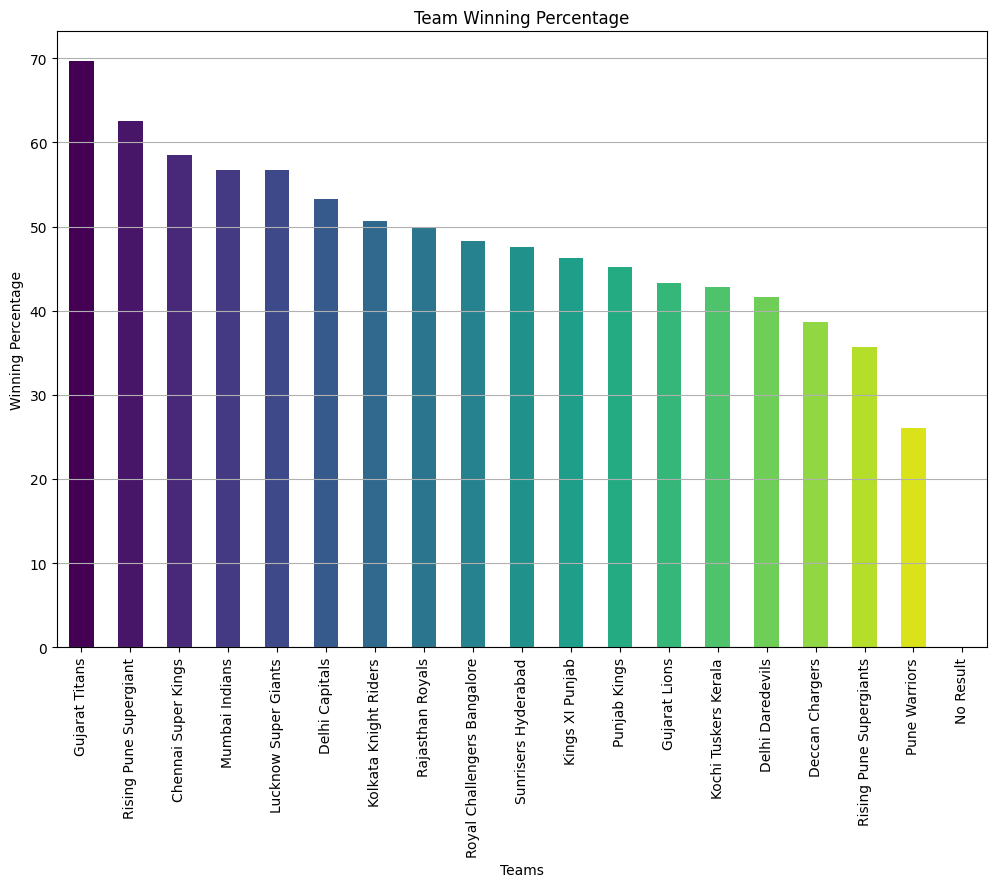

In [34]:
# Plot the winning percentage
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(team_win_percentage)))
team_win_percentage.plot(kind='bar', color=colors)
plt.title('Team Winning Percentage')
plt.xlabel('Teams')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Exploratory Data Analysis

#### Top 5 Highest Scoring Teams

Top 5 Highest Scoring Teams:
batting_team
Mumbai Indians                 39608
Royal Challengers Bangalore    37692
Kolkata Knight Riders          36664
Chennai Super Kings            36105
Rajasthan Royals               32100
Name: total_runs, dtype: int64 



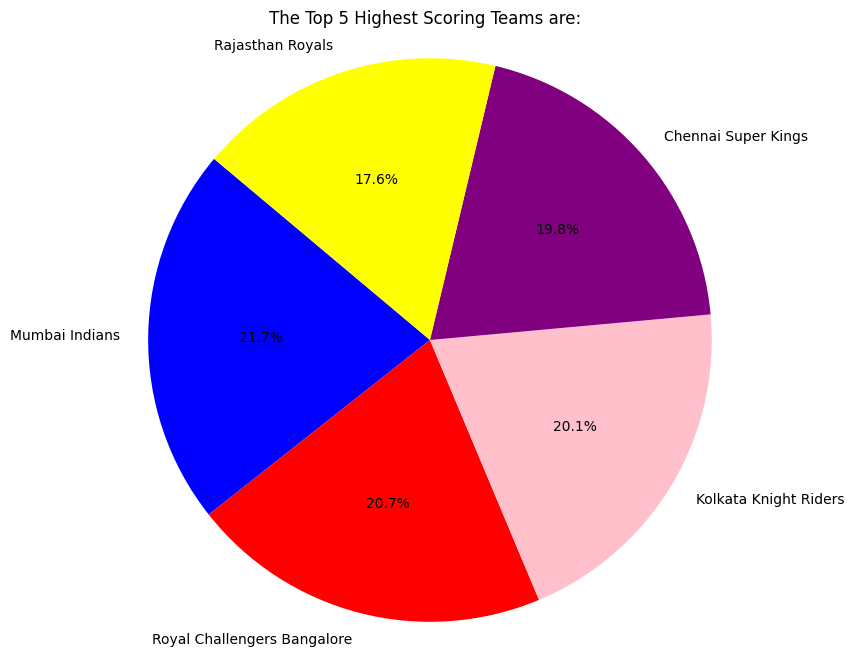

In [35]:
# Group the dataset by the batting team's name
team_statistics = Df_Merged.groupby('batting_team')

# Calculate the total runs scored by each team
total_runs_by_team = team_statistics['total_runs'].sum()

# Sort the teams based on the total runs scored in descending order
top_scoring_teams = total_runs_by_team.sort_values(ascending=False)

# Select the top 5 highest-scoring teams
top_5_teams = top_scoring_teams.head(5)

# Display the top 5 highest-scoring teams
print("Top 5 Highest Scoring Teams:")
print(top_5_teams,"\n")

# Create a pie chart
colors = ['blue', 'red', 'pink', 'purple', 'yellow']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(top_5_teams, labels=top_5_teams.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('The Top 5 Highest Scoring Teams are:  ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Total Wins of Every Team

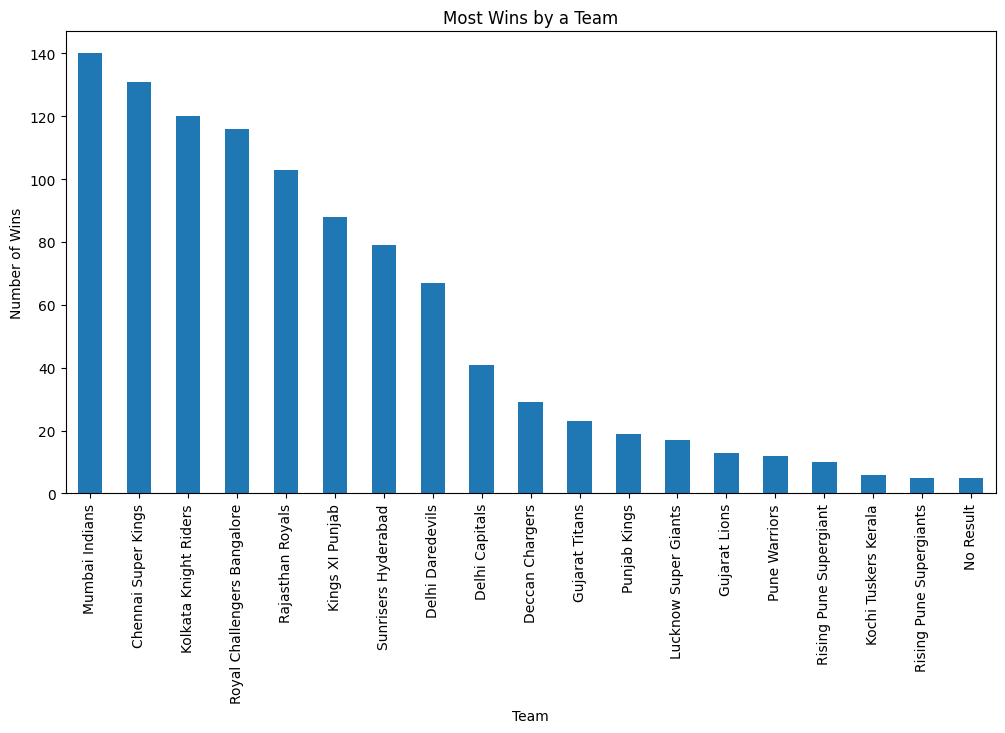

In [36]:
Data_matches['winner'].value_counts().plot.bar(figsize=(12, 6))
plt.title("Most Wins by a Team",size=12)
plt.xlabel("Team",size=10)
plt.ylabel("Number of Wins",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#### Matches Count by Venue

In [37]:
Df_Merged['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

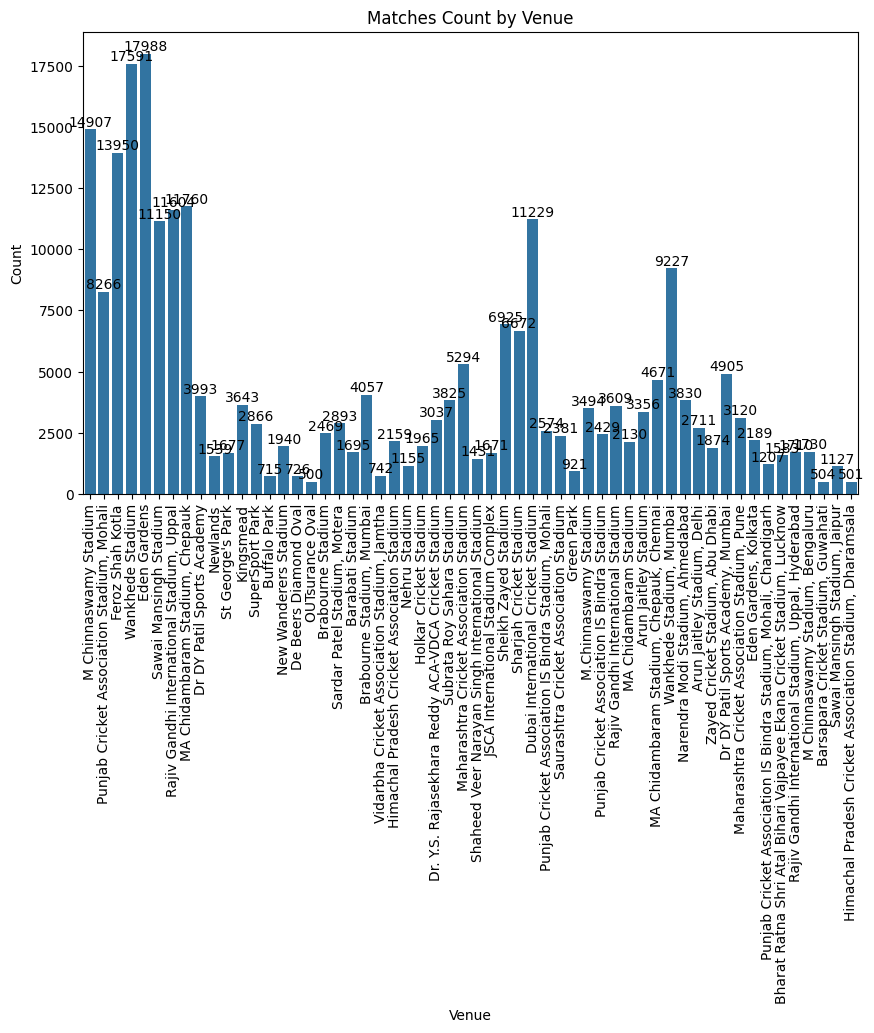

In [38]:
plt.figure(figsize=(10,6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
ax = sns.countplot(x='venue',data=Df_Merged)
plt.xticks(rotation=90)

plt.xlabel('Venue')
plt.ylabel('Count')

plt.title('Matches Count by Venue')

for i in ax.containers:
    ax.bar_label(i)
plt.show()


The above plot shows the number of matches taken place on each venue.

Eden Gardens has hosted the most number of IPL Games i.e. 77 games.

OUTsurance Oval has hosted the least number of games i.e. 2 games

#### Matches Count by City

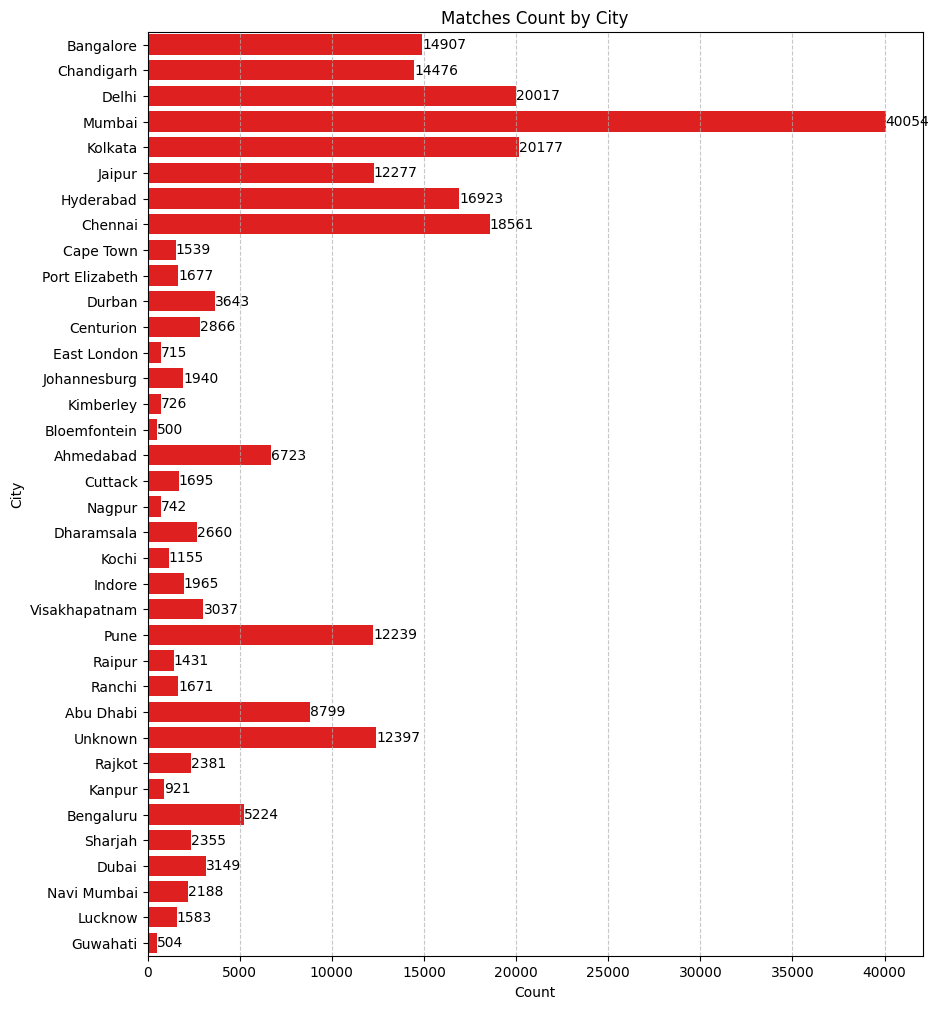

In [39]:
# Adjust figure size for better horizontal display
plt.figure(figsize=(10, 12))

# Use Seaborn's countplot with y parameter set to 'city' for horizontal orientation
ax = sns.countplot(y='city', data=Df_Merged, color='red')
# Adjust xlabel to represent count
plt.xlabel('Count')
# Adjust ylabel to represent city
plt.ylabel('City')

plt.title('Matches Count by City')

# Add labels at the edge of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [40]:
# Calculate total runs scored by each batsman
batsman_runs = Df_Merged.groupby('batter')['batsman_runs'].sum()
batsman_runs

batter
A Ashish Reddy     280
A Badoni           399
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yashpal Singh       47
Younis Khan          3
Yudhvir Singh        1
Yuvraj Singh      2754
Z Khan             117
Name: batsman_runs, Length: 637, dtype: int64

In [41]:
# Get the top 10 batsmen
top_batsmen = batsman_runs.sort_values(ascending=False).head(10)
top_batsmen

batter
V Kohli           7273
S Dhawan          6617
DA Warner         6399
RG Sharma         6213
SK Raina          5536
AB de Villiers    5181
MS Dhoni          5082
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4517
Name: batsman_runs, dtype: int64

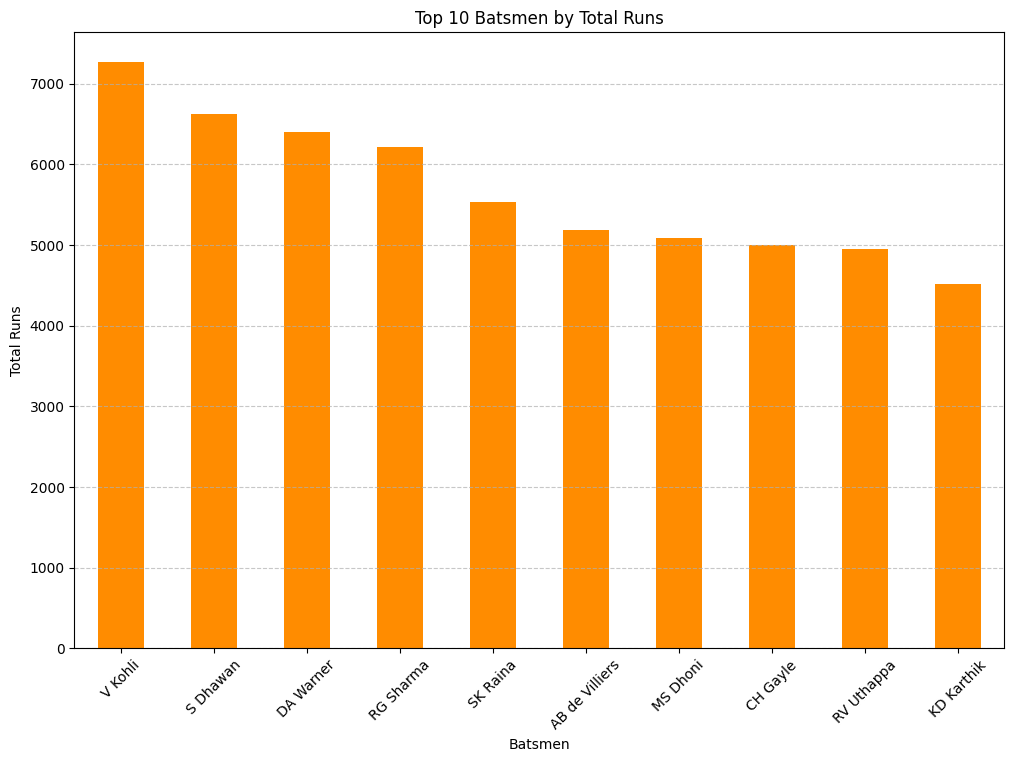

In [42]:
# Plot the top 10 batsmen
plt.figure(figsize=(12, 8))
top_batsmen.plot(kind='bar', color='darkorange')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
# Filter deliveries where a wicket has fallen
wickets = Df_Merged[Df_Merged['is_wicket'] == 1]
wickets

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243763,1370353,2,Chennai Super Kings,Gujarat Titans,6,3,RD Gaikwad,Noor Ahmad,DP Conway,0,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
243767,1370353,2,Chennai Super Kings,Gujarat Titans,6,7,DP Conway,Noor Ahmad,S Dube,0,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
243791,1370353,2,Chennai Super Kings,Gujarat Titans,10,5,AM Rahane,MM Sharma,S Dube,0,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker
243802,1370353,2,Chennai Super Kings,Gujarat Titans,12,4,AT Rayudu,MM Sharma,S Dube,0,...,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker


In [44]:
# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler')['is_wicket'].sum()
bowler_wickets

bowler
A Ashish Reddy     19
A Badoni            2
A Chandila         11
A Choudhary         5
A Flintoff          2
                 ... 
Yash Dayal         15
Yash Thakur        15
Yudhvir Singh       3
Yuvraj Singh       39
Z Khan            119
Name: is_wicket, Length: 435, dtype: int64

In [45]:
# Get the top 10 bowlers
top_bowlers = bowler_wickets.sort_values(ascending=False).head(10)
top_bowlers

bowler
DJ Bravo           207
YS Chahal          194
R Ashwin           189
PP Chawla          188
SL Malinga         188
B Kumar            184
A Mishra           182
SP Narine          182
JJ Bumrah          161
Harbhajan Singh    161
Name: is_wicket, dtype: int64

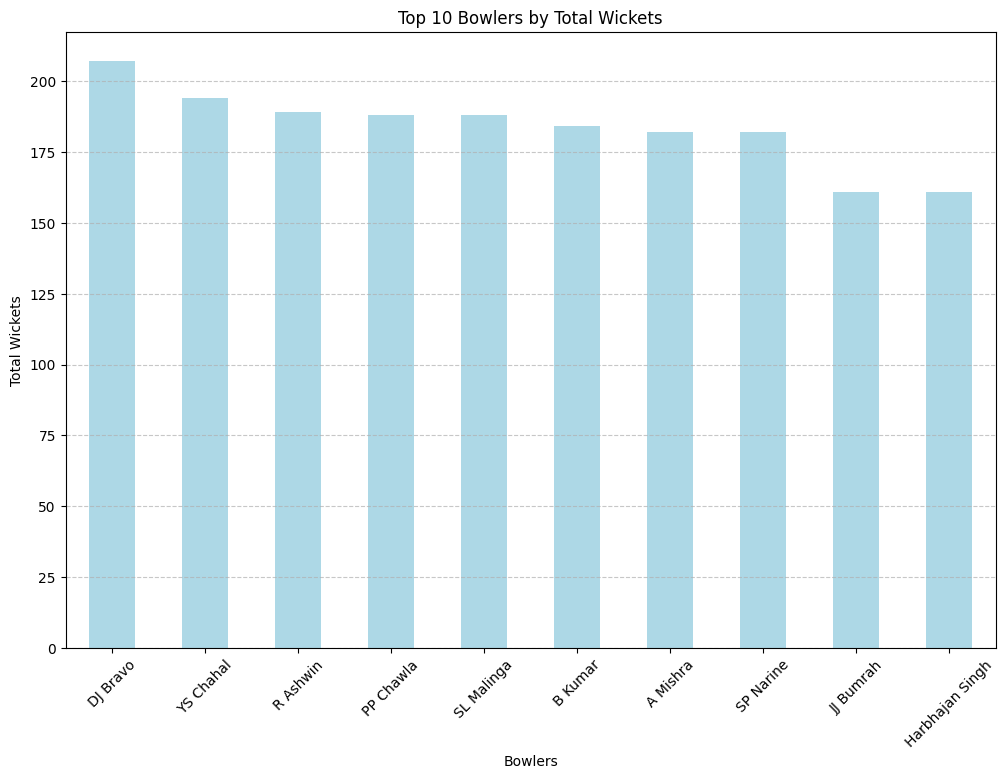

In [46]:
# Plot the top 10 bowlers
plt.figure(figsize=(12, 8))
top_bowlers.plot(kind='bar', color='lightblue')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

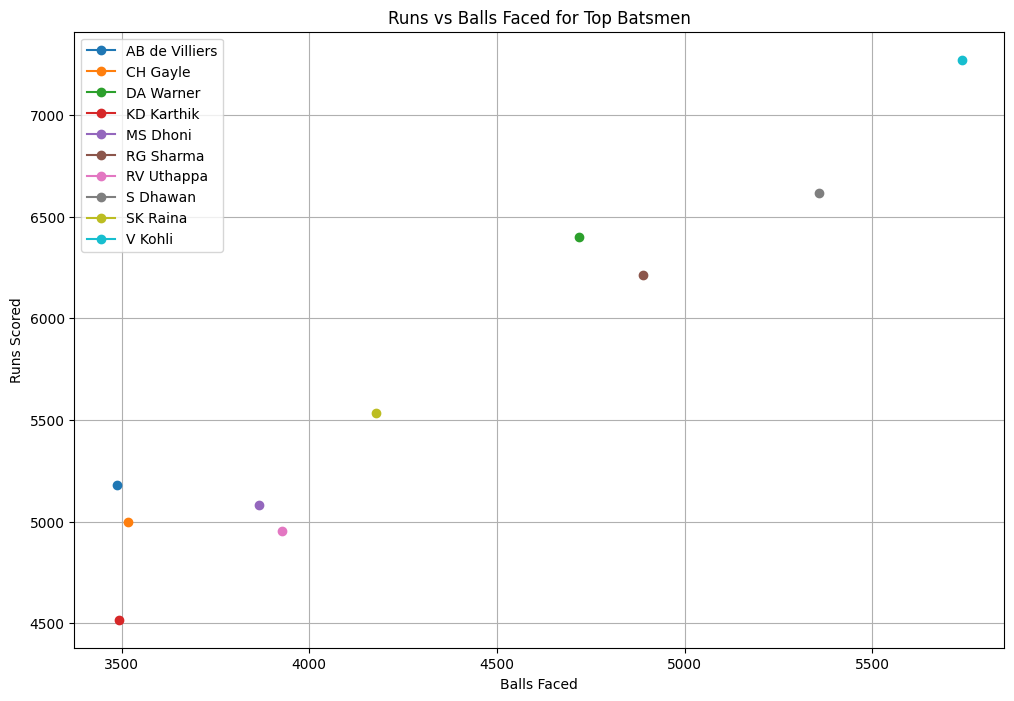

In [47]:
# Assuming you have calculated the runs and balls faced for top batsmen
top_batsmen_data = Df_Merged[Df_Merged['batter'].isin(top_batsmen.index)]
batsman_runs_balls = top_batsmen_data.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()

plt.figure(figsize=(12, 8))

# Plotting lines for each top batsman
for i, row in batsman_runs_balls.iterrows():
    plt.plot(row['ball'], row['batsman_runs'], marker='o', label=row['batter'])

plt.title('Runs vs Balls Faced for Top Batsmen')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.legend()
plt.grid(True)
plt.show()

#### Predicting Total Runs in an Over

#### Predicting whether a wicket will occur in cricket matches

Random Forest is chosen in this code for predicting wickets in cricket matches due to its ability to handle non-linearity, capture complex relationships, provide feature importance insights, robustness to overfitting, and capability to handle imbalanced data. These characteristics make it a powerful and effective choice for analyzing and predicting outcomes in sports analytics tasks where understanding and predicting critical events like wickets are essential.  

Cricket match data often involves non-linear relationships between features (such as over number, cumulative runs, batting team, bowling team, etc.) and the occurrence of wickets. Random Forests are capable of capturing these complex relationships effectively compared to simpler models like logistic regression.

In [58]:
# Preprocess the data
Df_Merged['is_wicket'] = Df_Merged['is_wicket'].astype(int)
Df_Merged['over'] = pd.to_numeric(Df_Merged['over'], errors='coerce')
Df_Merged['ball'] = pd.to_numeric(Df_Merged['ball'], errors='coerce')

In [59]:
# Create features
Df_Merged['is_powerplay'] = (Df_Merged['over'] < 6).astype(int)
Df_Merged['ball_in_over'] = Df_Merged['ball']
Df_Merged['cumulative_runs'] = Df_Merged.groupby('match_id')['total_runs'].cumsum()
Df_Merged['runs_in_over'] = Df_Merged.groupby(['match_id', 'over'])['total_runs'].cumsum()

In [62]:
# Encode categorical variables
le = LabelEncoder()
Df_Merged['batting_team'] = le.fit_transform(Df_Merged['batting_team'])
Df_Merged['bowling_team'] = le.fit_transform(Df_Merged['bowling_team'])
Df_Merged['batter'] = le.fit_transform(Df_Merged['batter'])
Df_Merged['bowler'] = le.fit_transform(Df_Merged['bowler'])

In [63]:
# Select features and target
features = ['over', 'ball_in_over', 'is_powerplay', 'cumulative_runs', 'runs_in_over', 
            'batting_team', 'bowling_team', 'batter', 'bowler']
X = Df_Merged[features]
y = Df_Merged['is_wicket']

In [64]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Make predictions
y_pred = rf.predict(X_test)

In [67]:
# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Results:
Accuracy: 0.9480149290460176

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46340
           1       0.12      0.01      0.01      2424

    accuracy                           0.95     48764
   macro avg       0.53      0.50      0.49     48764
weighted avg       0.91      0.95      0.93     48764


Confusion Matrix:
[[46212   128]
 [ 2407    17]]


#### Random Forest Results
Accuracy: 0.948  
This indicates that the model correctly predicted the outcome (whether a wicket occurred or not) approximately 94.8% of the time on the test set (y_test).

#### Classification Report
Precision: Precision for class 0 (no wicket) is high (0.95), meaning when it predicts no wicket, it is correct 95% of the time. Precision for class 1 (wicket) is very low (0.12), indicating that when it predicts a wicket, it is correct only 12% of the time.  
Recall: Recall for class 0 is 1.00, meaning it correctly identifies all instances of class 0. Recall for class 1 is very low (0.01), indicating that it misses most instances of class 1.  
F1-score: F1-score is a harmonic mean of precision and recall. F1-score for class 0 is high (0.97), indicating good performance. F1-score for class 1 is very low (0.01), reflecting poor performance in predicting class 1.  
Support: Number of samples for each class in the test set. Class 0 has 46,340 samples, and class 1 has 2,424 samples.

#### The confusion matrix shows:
True Negatives (TN): 46,212 instances were correctly predicted as no wicket.  
False Positives (FP): 128 instances were incorrectly predicted as wicket.  
False Negatives (FN): 2,407 instances were incorrectly predicted as no wicket.  
True Positives (TP): 17 instances were correctly predicted as wicket.

In [68]:
# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Feature Importance:
           feature  importance
7           batter    0.184208
3  cumulative_runs    0.177398
8           bowler    0.157373
1     ball_in_over    0.143623
4     runs_in_over    0.095874
6     bowling_team    0.085292
5     batting_team    0.082891
0             over    0.070360
2     is_powerplay    0.002982


#### Predict the number of runs scored off each ball

#### Predict total runs scored in an innings

#### Predict the match winner
